In [0]:
#패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#파일 불러오기
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv
User uploaded file "pima-indians-diabetes.csv" with length 24045 bytes


In [11]:
#파일 확인하기
!ls

pima-indians-diabetes.csv  sample_data


In [0]:
dataset=np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [0]:
#데이터 셋 설정하기
x_train=dataset[:700,0:8]
y_train=dataset[:700,8]
x_test=dataset[700:,0:8]
y_test=dataset[700:,8]

In [17]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [0]:
#모델 구성하기
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#모델 학습과정 설정하기
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [39]:
#모델 학습시키기
hist=model.fit(x_train,y_train, epochs=1000, batch_size=64)



Epoch 1/1000
700/700 [==============================] - 1s 1ms/step - loss: 5.5477 - acc: 0.6557
Epoch 2/1000
700/700 [==============================] - 0s 25us/step - loss: 5.5435 - acc: 0.6557
Epoch 3/1000
700/700 [==============================] - 0s 24us/step - loss: 5.5380 - acc: 0.6557
Epoch 4/1000
700/700 [==============================] - 0s 22us/step - loss: 5.5267 - acc: 0.6557
Epoch 5/1000
700/700 [==============================] - 0s 21us/step - loss: 4.8732 - acc: 0.6543
Epoch 6/1000
700/700 [==============================] - 0s 21us/step - loss: 3.5642 - acc: 0.6314
Epoch 7/1000
700/700 [==============================] - 0s 24us/step - loss: 2.2956 - acc: 0.6171
Epoch 8/1000
700/700 [==============================] - 0s 28us/step - loss: 1.2646 - acc: 0.5843
Epoch 9/1000
700/700 [==============================] - 0s 24us/step - loss: 1.1589 - acc: 0.5614
Epoch 10/1000
700/700 [==============================] - 0s 21us/step - loss: 1.0343 - acc: 0.6029
Epoch 11/1000
700/7

In [63]:
#학습과정 살펴보기
#모델 평가하기
#정확도
scores=model.evaluate(x_test, y_test)
print("%s : %.2f" % (model.metrics_names[1], scores[1]*100))


68/68 [==============================] - 0s 122us/step
acc : 76.47


In [45]:
scores

[0.6194392232333913, 0.7647058823529411]

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

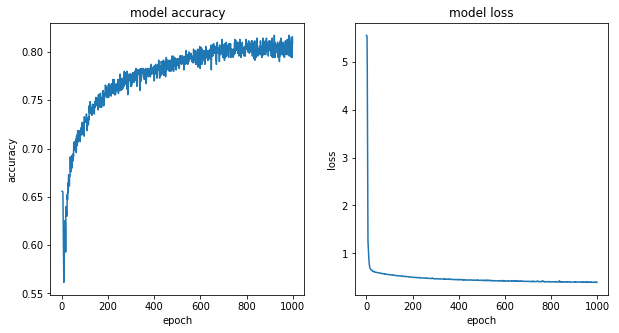

In [50]:
fig,(ax0,ax1)=plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))

#모델의 정확도
ax0.plot(hist.history['acc'])
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

#모델의 오차
ax1.plot(hist.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

In [62]:
patient=np.array([[0,137,90,35,168,43.1,2.228,33]])
#모델 예측하기
prediction=model.predict(patient)
print(prediction)

[[0.35530573]]
